# 3. Find similar wines!

In [1]:
import pandas as pd
import matplotlib
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

We load the dataset and we normalize the parameters. Normalization ensures that good quality clusters are generated which can improve the efficiency of clustering algorithms.So it becomes an essential step before clustering as Euclidean distance is very sensitive to the changes in the differences. 

In [2]:
wine=pd.read_csv('wine.data')

wine.columns = ['class_identifier', 'Alcohol', 'Malic_acid', 'Ash', 
              'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 
              'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 
              'Color_intensity', 'Hue', 'OD280/OD315_of_diluted wines', 'Proline']


df_unlabelled = wine.copy()

scaled_df_unlabelled = scale(df_unlabelled)

scaled_df_unlabelled_df = pd.DataFrame(scaled_df_unlabelled)
scaled_df_unlabelled_df.columns = ['class_identifier', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 
        'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 
        'Color_intensity', 'Hue', 'OD280/OD315_of_diluted wines', 'Proline']

standardized_wine=scaled_df_unlabelled_df
standardized_wine.head()

,class_identifier,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted wines,Proline
0,-1.222468,0.255824,-0.501624,-0.824485,-2.500110,0.029180,0.572666,0.739636,-0.823139,-0.538575,-0.291130,0.407100,1.131698,0.971052
1,-1.222468,0.206229,0.018020,1.107690,-0.275639,0.099932,0.812784,1.221645,-0.501337,2.145975,0.269729,0.319567,0.804579,1.400998
2,-1.222468,1.706501,-0.349315,0.487935,-0.816726,0.948953,2.493609,1.472691,-0.984039,1.040572,1.184362,-0.424458,1.202811,2.340509
3,-1.222468,0.305420,0.224086,1.836812,0.445811,1.302712,0.812784,0.669343,0.222716,0.408913,-0.317016,0.363334,0.463238,-0.032154
4,-1.222468,1.495719,-0.519543,0.305655,-1.297693,0.878201,1.565153,1.372273,-0.179536,0.672104,0.731360,0.407100,0.349457,2.244965


K-Means is implicitly based on pairwise Euclidean distances b/w data points, because the sum of squared deviations from centroid is equal to the sum of pairwise squared Euclidean distances divided by the number of points. K-means is appropriate to use in combination with the Euclidean distance because the main objective of k-means is to minimize the sum of within-cluster variances, and the within-cluster variance is calculated in exactly the same way as the sum of Euclidean distances between all points in the cluster to the cluster centroid. As other answers point out, the algorithm is only guaranteed to converge (even if to a local minimum) if both the centroid update step and the data points reassignment step are done in the same n-dimensional Euclidean space. Also, the mean is the best estimator to be used when one needs to minimize total variance.

$$|\vec{d}|=\sqrt{(x{1}-x{0})^2 + (y{1}-y{0})^2}$$(1)


To calculate Euclidean distance with NumPy we can use numpy.linalg.norm:

In [3]:
def euclidean_distance(x, y):
    return np.linalg.norm(x - y)


## K-means algorithm is based on the following steps: 

### Step 1: Initialization
- To start we need to initialize the k-means. This is done by choosing the amplitude of the data set and k randomly arranged initial centroids. Choosing the number of centroids, you choose the clusters to which the data set will be composed and then the groupings you want to make and display.

### Step 2: Assignment of the cluster
- In this phase, the algorithm analyzes each of the data points and assigns them to the nearest centroid.Then the Euclidean distance is calculated between each data point and each centroid. Each data points will then be assigned to the centroid whose distance is minimal.

### Step 3: Updating the centroid position
- After step 2 it is likely that new clusters have been formed, as new data points will have been assigned (or removed depending on whether they have been transferred to another cluster). Consequently, the average position of the centroids is recalculated. The new value of a centroid will be the average of all the data points that have been assigned to the new cluster.


The algorithm ends here: or rather, we will continue to repeat steps 2 and 3 until the centroids change, ie we reach a point of convergence such that we no longer have changes to the clusters.It is said that the stop condition in this case has been reached. Usually it is represented by one of the following options:

1. no data points change cluster;

2. the sum of the distances is reduced to a minimum;

3. maximum number of iterations is reached.




In [4]:
def get_rand_centroids(min_lst,max_lst,n):
    centroids=np.zeros((n,len(min_lst)))
    for i in range(n):
        for j in range(len(min_lst)):
            max_=max_lst[j]
            min_=min_lst[j]
            rand=random.uniform(min_,max_)
            #print(i,j)
            centroids[i][j]=rand
    return centroids


In [5]:
def get_clusters(centroids, data, n):
    clusters= np.zeros(len(data))
    for i in range(len(data)):
        min_dis=10000
        for j in range(len(centroids)):
            distance = euclidean_distance(data[i], centroids[j])
            if distance < min_dis: 
                min_dis = distance
                clusters[i]= j
        min_dis=10000
    
    new_centroids = get_centroids(clusters, data, n)
    
    
    return clusters,new_centroids

In [6]:
def get_centroids(clusters, data, n):
    centroids=np.zeros((n,len(data[0])))
    for i in range(n):
        cluster_points = np.where(clusters == i)
        centroids[i]= data[cluster_points].mean(0)
    return centroids

In [7]:
def kmeans(num, dataset):
    centroids = []
    
    for item in np.random.randint(instances-1, size=num):
        centroids.append(dataset[item])
    #print(centroids)
    
    dictionary = {}
    for i in range(num):
        dictionary[i] = []
        dictionary[i].append(centroids[i])
    #print(dict)
    
    changed = {}
    while(dictionary != changed):
        changed = dictionary
        for item in dataset:
            distance = []
            for center in centroids:
                #print(item[i])
                distance.append(calcDistance(item, center))
            cluster = distance.index(min(distance))
            dictionary[cluster].append(item)
            
        centroids = []
        
        for item in dictionary:
            centroids.append(calcCentroids(dictionary[item]))
    print(dictionary)

In [8]:
def kmeans_model(data,n):
    max_lst= np.array([data[:,i].max() for i in range(len(data[0])) ])
    min_lst= np.array([data[:,i].min() for i in range(len(data[0])) ])
    centroids= get_rand_centroids(min_lst,max_lst,n)
    clusters= np.zeros(len(data))

    new_clusters, new_centroids= get_clusters(centroids, data, n)

    while not np.array_equal(new_clusters,clusters):
        clusters, centroids=new_clusters, new_centroids
        new_clusters, new_centroids= get_clusters(centroids, data, n)

    return clusters

In [11]:
k=kmeans_model(standardized_wine.values,3)
clusters={}
for i in range(3):
    clusters[i]=np.where(k == i)

Now we can visualize the composition of the three clusters:

In [13]:
clusters

{0: (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
          13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
          26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
          39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
          52,  53,  54,  55,  56,  57,  72,  94, 120], dtype=int64),),
 1: (array([ 82, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
         141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
         167, 168, 169, 170, 171, 172, 173, 174, 175, 176], dtype=int64),),
 2: (array([ 58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
          71,  73,  74,  75,  76,  77,  78,  79,  80,  81,  83,  84,  85,
          86,  87,  88,  89,  90,  91,  92,  93,  95,  96,  97,  98,  99,
         100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
         113, 114, 115, 116, 1

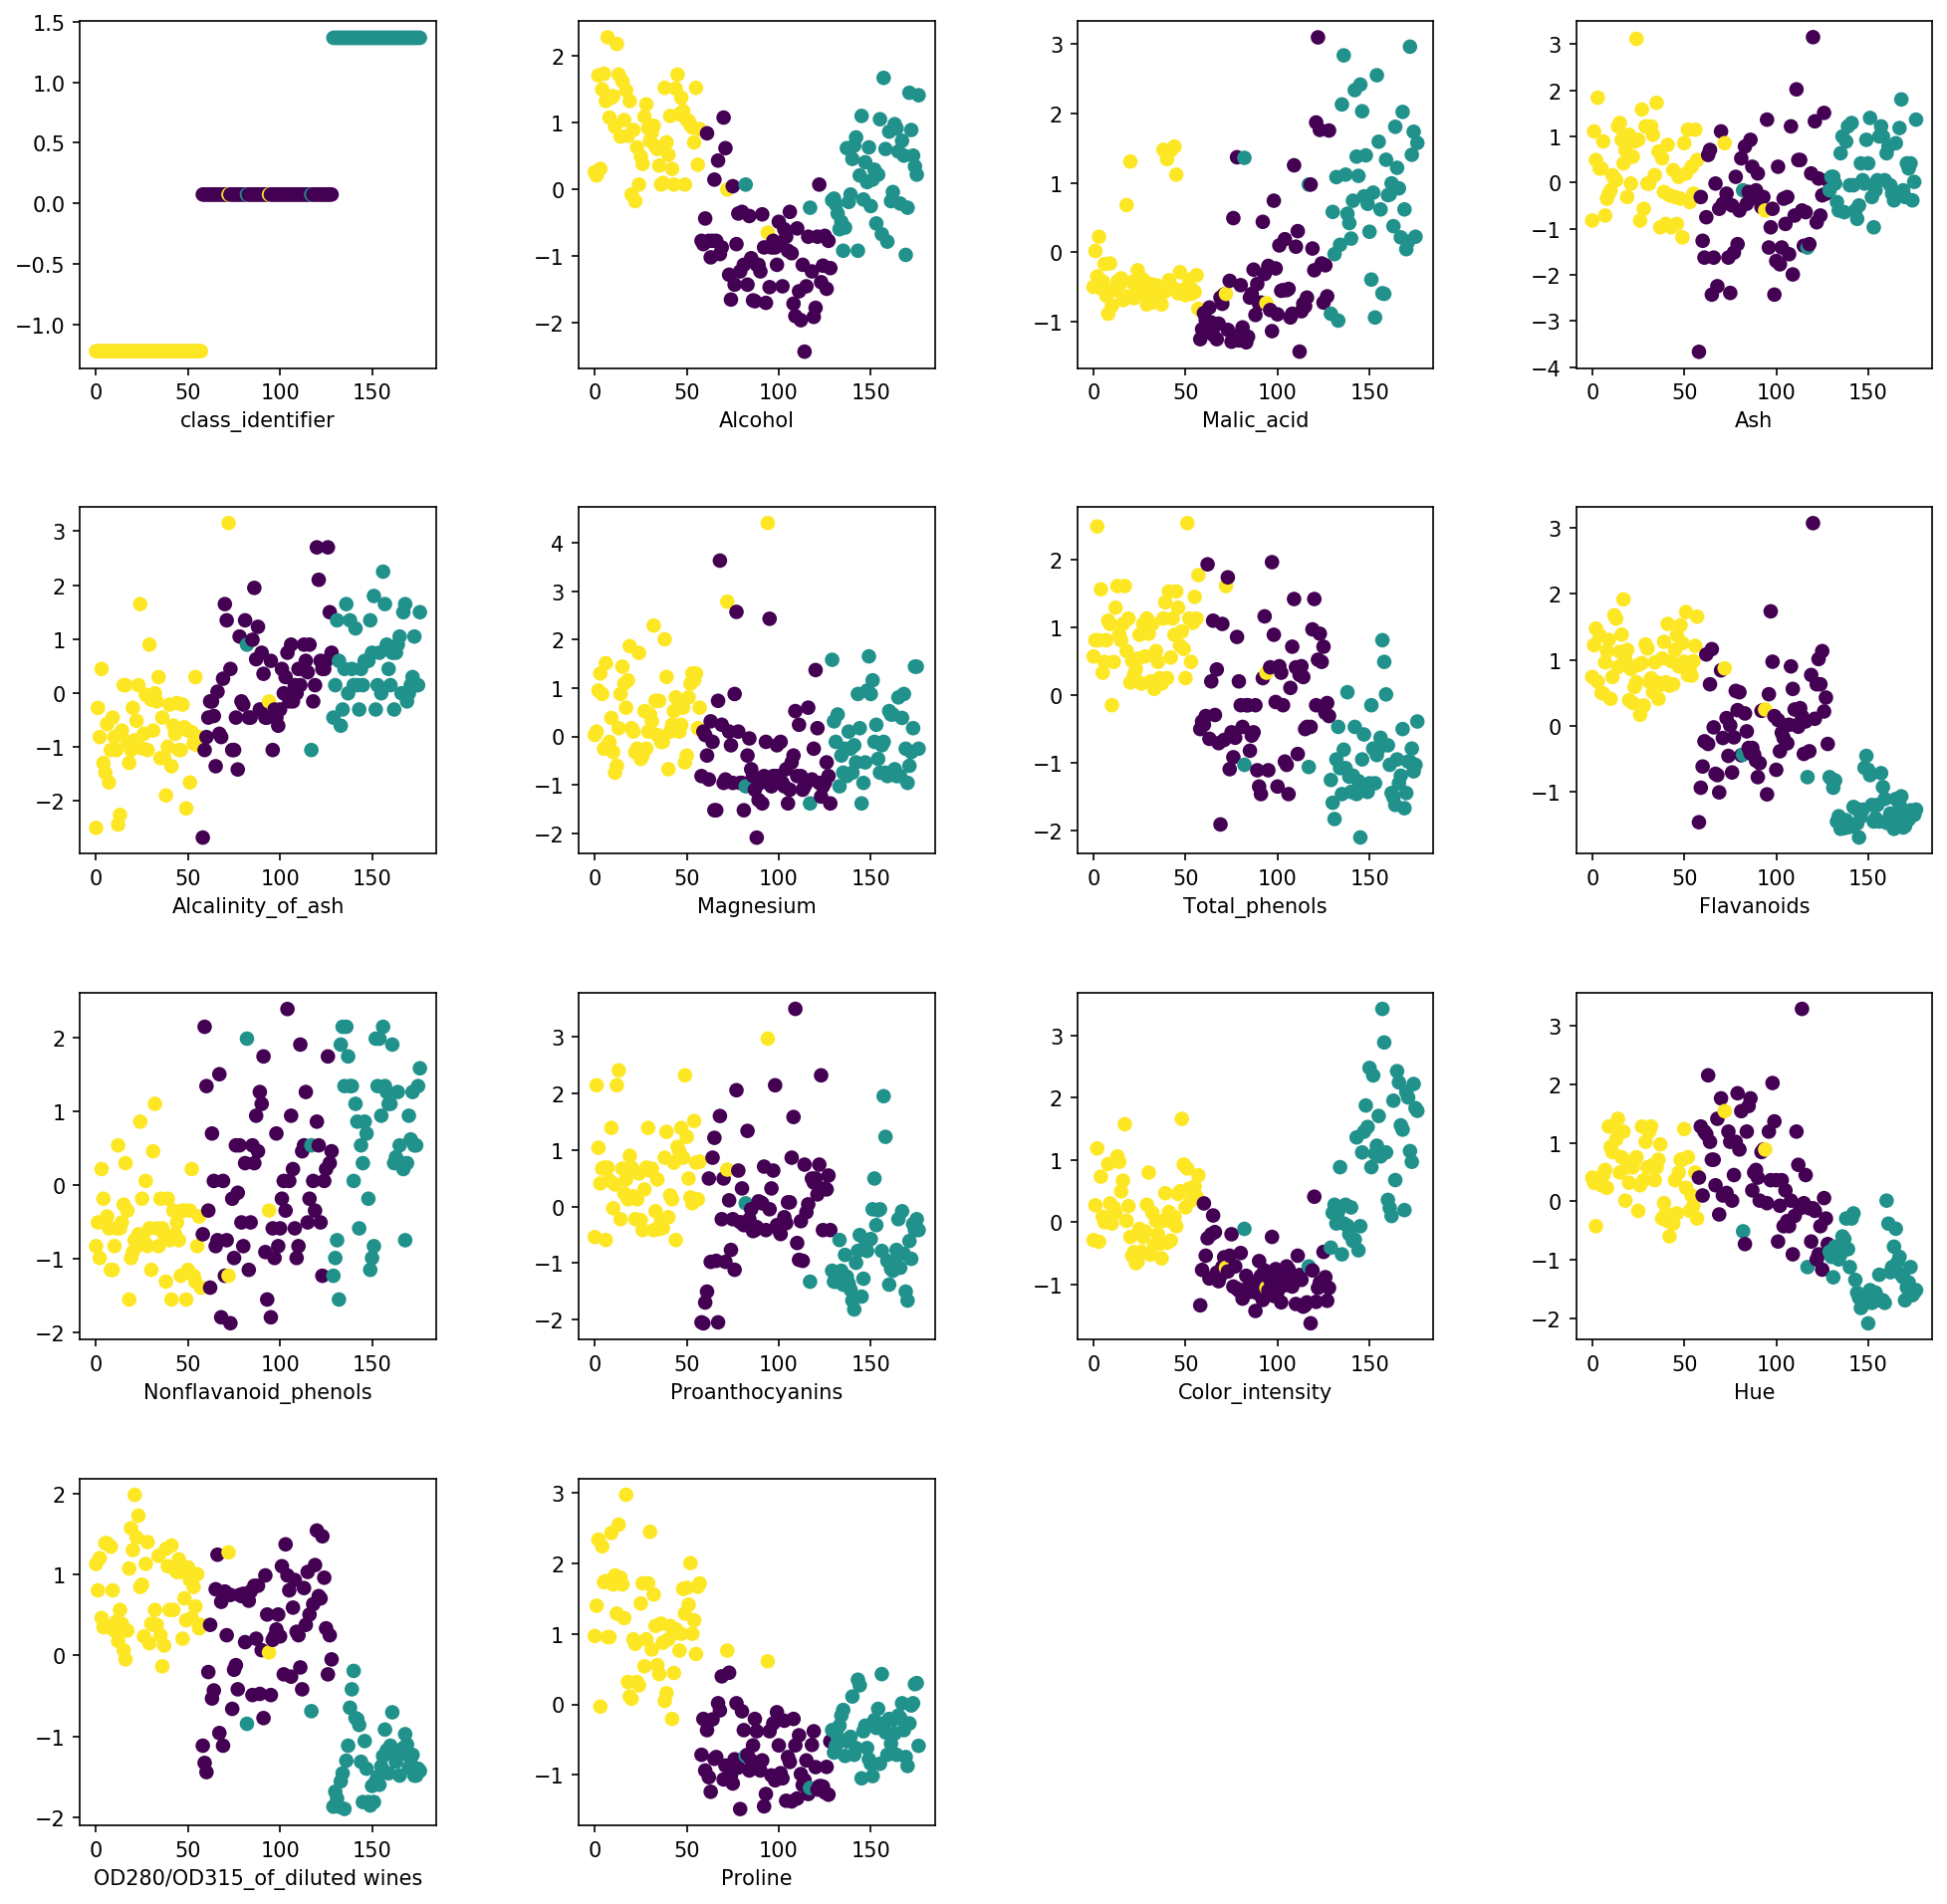

In [139]:
fig = plt.figure(figsize=(16, 16), dpi=150)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
x=1
for i in standardized_wine:
    ax = fig.add_subplot(4, 4, x)
    ax.scatter(range(len(standardized_wine)), standardized_wine[i], c=k)
    ax.set_xlabel(i)
    x+=1

#### Cluster 1:
Almost of the elements of the first cluster belong to the class type '1'. The instances 72,94,120 belong to the class type'2'. 
#### Cluster 2:
Almost of the elements of the first cluster belong to the class type '3'. The instances 82,129,130 belong to the class type'2'. 
#### Cluster 3: 
Almost of the elements of the first cluster belong to the class type '2'. The instances 58 and 59 belong to the class type'1'. 

We can observe that the clustering is based on the type of wine. So now we'll explore the different features to determine the most important features for the classification of the wines

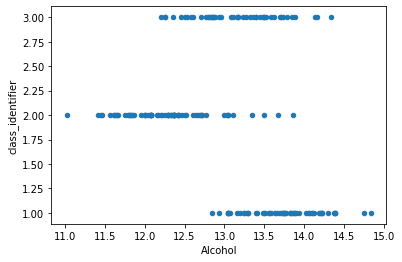

In [21]:
import matplotlib.pyplot as plt
wine.plot.scatter(x = 'Alcohol', y = 'class_identifier')

The lowest level of alcohol is for wines that belong to the class type 2, the most alcoholic wines are the type 1 wines, type 3 wines have a medium level of alcohol, even if this is a general overwiew, because there are some outliers

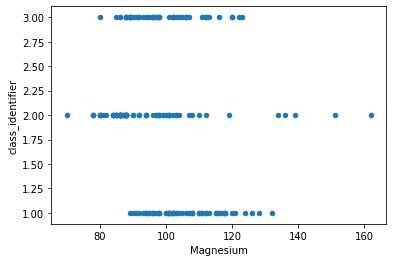

In [22]:
wine.plot.scatter(x = 'Magnesium', y = 'class_identifier')

This variable is not very relevant because there is no clear distinction between the different categories

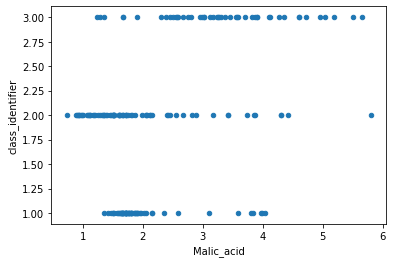

In [23]:
wine.plot.scatter(x = 'Malic_acid', y = 'class_identifier')

This variable is not very relevant because there is no clear distinction between the different categories

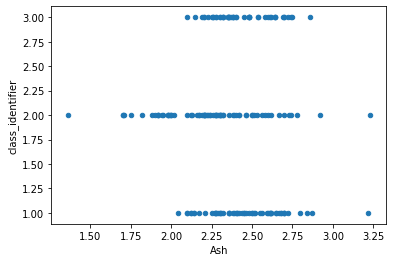

In [25]:
wine.plot.scatter(x = 'Ash', y = 'class_identifier')

This variable is not very relevant because there is no clear distinction between the different categories

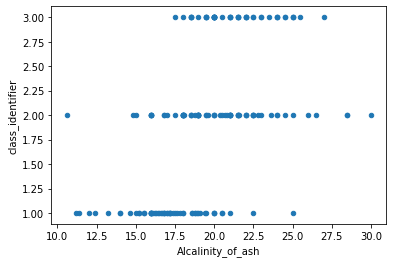

In [26]:
wine.plot.scatter(x = 'Alcalinity_of_ash', y = 'class_identifier')

The wines with the lowest level of Alcalinity of Ash are the wines that belong to the class type 1, for this variable too there are some outliers, especially for the class type 2

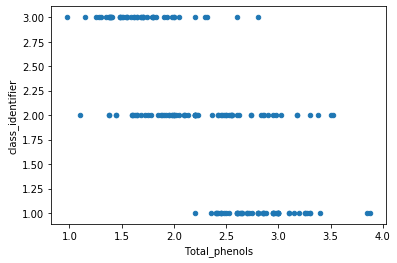

In [27]:
wine.plot.scatter(x = 'Total_phenols', y = 'class_identifier')

The the most part of type 3 wines has the lowest level of total phenols , the highest level is for the type 1 wines

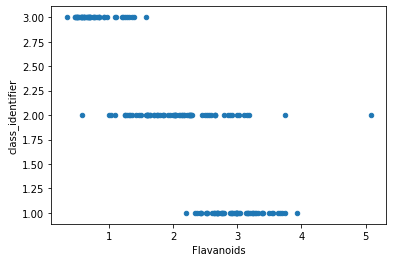

In [28]:
wine.plot.scatter(x = 'Flavanoids', y = 'class_identifier')

Class type 3 has the lowest level of flavanoids

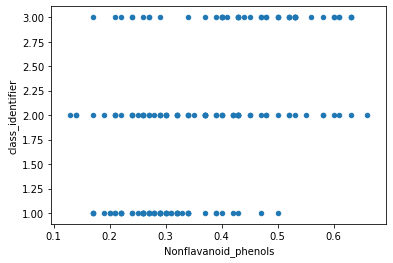

In [30]:
wine.plot.scatter(x = 'Nonflavanoid_phenols', y = 'class_identifier')

It's not a relevant feature

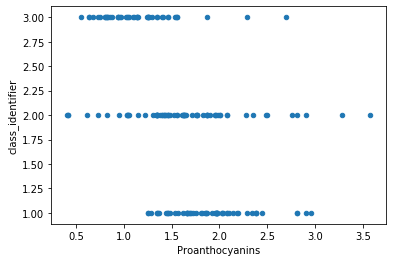

In [31]:
wine.plot.scatter(x = 'Proanthocyanins', y = 'class_identifier')

It's not a relevant feature

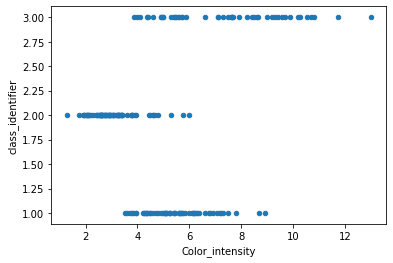

In [32]:
wine.plot.scatter(x = 'Color_intensity', y = 'class_identifier')

The wines that belong to second type are the wines that have the lowest level of color intensity, the wines that have the most intense colour are type 3 wines 

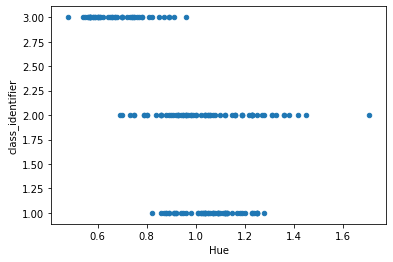

In [33]:
wine.plot.scatter(x = 'Hue', y = 'class_identifier')

Type 3 wines have the lowest level of Hue

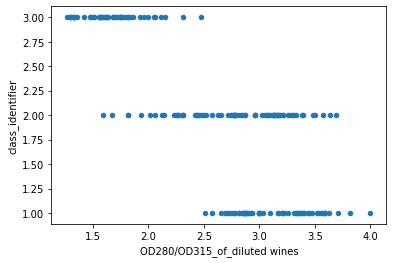

In [34]:
wine.plot.scatter(x = 'OD280/OD315_of_diluted wines', y = 'class_identifier')

Type 1 wines have the highest level of OD280/OD315_of_diluted wines, type 3 have the lowest

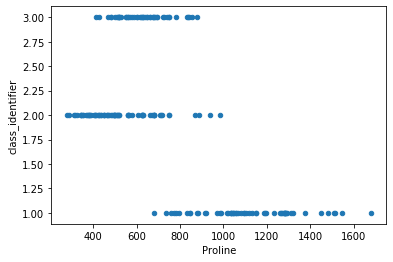

In [35]:
wine.plot.scatter(x = 'Proline', y = 'class_identifier')

Type 1 wines have the highest level of proline


### Final interpretation

observing the results of the clustering process, we realized how the classification took place based on the class to which it belonged. At this point, in order to give an overall assessment of the weight of each individual variable, we went to observe the influence of each of them with respect to the subdivision of the wines in these classes.

### Cluster 1
In this cluster there are the most alcoholic wines, with the highest level of proline and  OD280/OD315_of_diluted wines but with the lowest level of Alcalinity of Ash
### Cluster 2
In this cluster there are the less alcoholic wines, that has the lowest level of colour intensity 
### Cluster 3
In this cluster there are the  wines, with the lowest level of OD280/OD315_of_diluted wines and Hue, but this kind of wines has the highest level of colour intensity. They present a medium level of Alcohol. 